# Introduction

Data Set Problems    
 The company seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not.

# Objectives of Notebook 

This notebook aims to:

Analyze customer data provided in data set (EDA)  
Build various ML models that can predict loan approval

The machine learning models used in this project are:

Logistic Regression  
K-Nearest Neighbour (KNN)  
Support Vector Machine (SVM)  
Naive Bayes  
Decision Tree   
Random Forest     

## Importing libraries

In [1]:
# for data handling
import pandas as pd 
# for numerical operations
import numpy as np 
# for statistical data visualization
import seaborn as sns 

# for creating plots and charts
import matplotlib.pyplot as plt 
%matplotlib inline 
# ensures that Matplotlib plots appear directly in Jupyter Notebook 
import warnings    # Warnings are suppressed to prevent clutter in the output 
warnings.filterwarnings("ignore")

# Library to perform feature scaling
from sklearn.preprocessing import MinMaxScaler
# library to address class imbalance
from imblearn.over_sampling import RandomOverSampler
# Library for splitting data into training and testing sets, and for cross-validation
from sklearn.model_selection import cross_val_score, train_test_split
# Library for evaluating machine learning model performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# a commonly used statistical method for binary classification tasks
from sklearn.linear_model import LogisticRegression
#  for classification tasks based on similarity to neighboring data points.
from sklearn.neighbors import KNeighborsClassifier
# for classification tasks, which is effective for both linear and non-linear data separation
from sklearn.svm import SVC

# Naive Bayes classifier specifically designed for datasets with categorical features, 
# which is useful for classification tasks involving categorical data.
from sklearn.naive_bayes import CategoricalNB
# Naive Bayes classifier that assumes that the features follow a Gaussian (normal) distribution,
# making it suitable for classification tasks with continuous numeric data.
from sklearn.naive_bayes import GaussianNB

# recursively split the data into subsets based on feature conditions to make predictions.
from sklearn.tree import DecisionTreeClassifier
# combines multiple decision trees to improve predictive accuracy and reduce overfitting
from sklearn.ensemble import RandomForestClassifier

# ombines the predictions of multiple weak learners (typically decision trees) 
# in an additive manner to improve predictive performance.
from sklearn.ensemble import GradientBoostingClassifier
# for classification tasks, known for its high performance and optimization capabilities
from xgboost import XGBClassifier

## Importing libraries 

## Reading Data Set

In [2]:
# Loading dataset

loan = pd.read_csv("loan.csv")

In [3]:
# Display Top 5 Rows of The Dataset

loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Check Last 5 Rows of The Dataset

loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# Find Shape of Our Dataset

print("Number of Rows",loan.shape[0])
print("Number of Columns",loan.shape[1])

Number of Rows 614
Number of Columns 13


In [6]:
# Information about the data

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- The dataset has a total of 614 rows (entries), ranging from index 0 to 613.
- There are 13 columns in the dataset, each with different data types (Dtype).
- For each column, it provides the following information:
  1. Column name (e.g., Loan_ID, Gender, Married, etc.)
  2. Non-null count: The number of non-null (non-missing) entries in that column.
  3. Dtype: The data type of the column (e.g., int64 for integers, float64 for floating-point numbers, and object for strings or mixed data types).
- The 'memory usage' at the end indicates the amount of memory (in kilobytes) used by this DataFrame.

# Data Exploration 

### Gender

In [7]:
loan.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

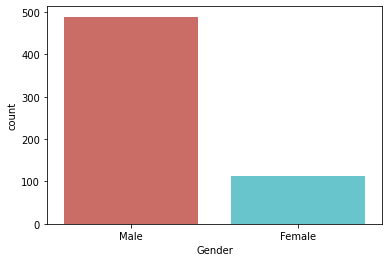

In [8]:
sns.countplot(x="Gender", data=loan, palette="hls")
plt.show()

In [9]:
pd.crosstab(loan.Gender , loan.Loan_Status, margins = True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


**Gender vs. Loan Status:**           
- A cross-tabulation (contingency table) is created to show how 'Gender' relates to 'Loan_Status.'           
- It reveals the count of loan approvals ('Y') and rejections ('N') for each gender category.                 
- There are 187 loans rejected, 414 loans approved, and 601 total entries.

### Married

In [10]:
loan.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

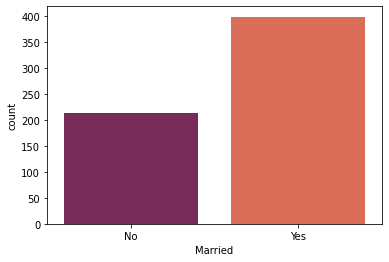

In [11]:
sns.countplot(x="Married", data=loan, palette="rocket")
plt.show()

In [12]:
pd.crosstab(loan['Married'],loan['Gender'])

Gender,Female,Male
Married,,
No,80,130
Yes,31,357


**Marital Status vs. Gender:**     
- A cross-tabulation is created to show how marital status ('Married' and 'Not Married') relates to gender ('Female' and 'Male').  
- It reveals the count of females and males in each marital status category.        
- For example, there are 80 females and 130 males who are not married ('No'), and 31 females and 357 males who are married ('Yes').

### Education

In [13]:
loan.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

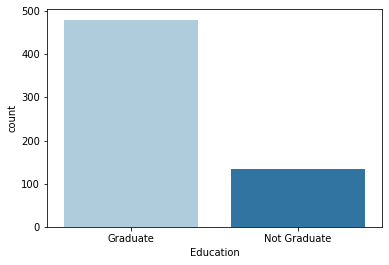

In [14]:
sns.countplot(x="Education", data=loan, palette="Paired")
plt.show()

In [15]:
pd.crosstab(loan['Education'],loan['Gender'])

Gender,Female,Male
Education,,
Graduate,92,376
Not Graduate,20,113


**Education vs. Gender:**
- A cross-tabulation shows how education level ('Graduate' and 'Not Graduate') relates to gender ('Female' and 'Male').
- For example, there are 92 females and 376 males who are graduates, and 20 females and 113 males who are not graduates.

### Self Employed

In [16]:
loan.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

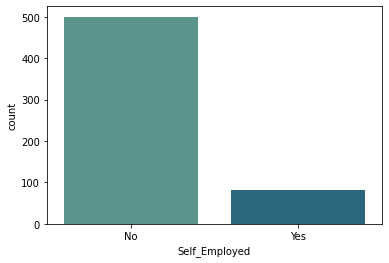

In [17]:
sns.countplot(x="Self_Employed", data=loan, palette="crest")
plt.show()

In [18]:
pd.crosstab(loan['Self_Employed'],loan['Gender'])

Gender,Female,Male
Self_Employed,,
No,89,402
Yes,15,63


**Self Employed vs. Gender:**
- A cross-tabulation shows how self-employment status ('Yes' and 'No') relates to gender ('Female' and 'Male'). 
- For example, there are 89 females and 402 males who are not self-employed ('No'), and 15 females and 63 males who are self-employed ('Yes').

### Credit History

In [19]:
loan.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

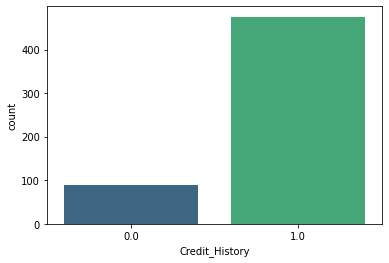

In [20]:
sns.countplot(x="Credit_History", data=loan, palette="viridis")
plt.show()

In [21]:
pd.crosstab(loan['Credit_History'],loan['Gender'])

Gender,Female,Male
Credit_History,,
0.0,17,69
1.0,84,382


**Credit History vs. Gender:**
- A cross-tabulation shows how credit history ('0.0' and '1.0') relates to gender ('Female' and 'Male').
- For example, there are 17 females and 69 males with a credit history of '0.0', and 84 females and 382 males with a credit history of '1.0'.

### Property Area

In [22]:
loan.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

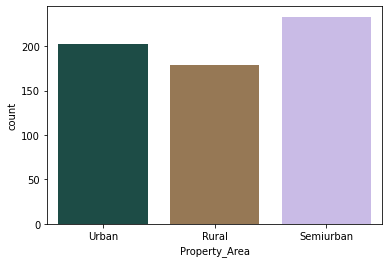

In [23]:
sns.countplot(x="Property_Area", data=loan, palette="cubehelix")
plt.show()

In [24]:
pd.crosstab(loan['Property_Area'],loan['Gender'])

Gender,Female,Male
Property_Area,,
Rural,24,151
Semiurban,55,172
Urban,33,166


**Property Area vs. Gender:**
- A cross-tabulation shows how property area ('Semiurban', 'Urban', and 'Rural') relates to gender ('Female' and 'Male').
- For example, there are 24 females and 151 males in the 'Rural' area, 55 females and 172 males in the 'Semiurban' area, and 33 females and 166 males in the 'Urban' area.

### Loan Status

In [25]:
loan.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

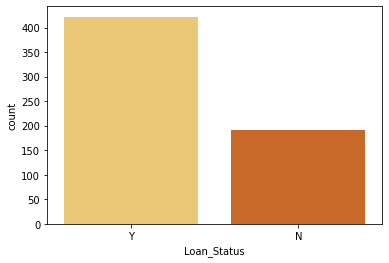

In [26]:
sns.countplot(x="Loan_Status", data=loan, palette="YlOrBr")
plt.show()

In [27]:
pd.crosstab(loan['Loan_Status'],loan['Gender'])

Gender,Female,Male
Loan_Status,,
N,37,150
Y,75,339


**Loan Status vs. Gender:**
- A cross-tabulation shows how loan approval status ('Y' and 'N') relates to gender ('Female' and 'Male').
- For example, there are 37 females and 150 males with a loan status of 'N' (not approved), and 75 females and 339 males with a loan status of 'Y' (approved).

### Loan Amount Term

In [28]:
loan.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

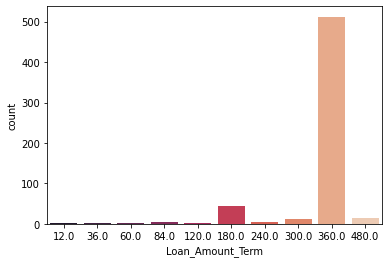

In [29]:
sns.countplot(x="Loan_Amount_Term", data=loan, palette="rocket")
plt.show()

In [30]:
pd.crosstab(loan['Loan_Amount_Term'],loan['Gender'])

Gender,Female,Male
Loan_Amount_Term,,
12.0,0,1
36.0,1,1
60.0,0,2
84.0,1,3
120.0,0,3
180.0,3,40
240.0,1,3
300.0,1,11
360.0,98,403


**Loan Amount Term vs. Gender:**
- A cross-tabulation shows how loan amount terms relate to gender ('Female' and 'Male').
- For example, there is 1 male applicant with a loan amount term of 12 months, 1 female and 1 male applicant with a term of 36 months, and so on.

# Distribution of Numerical Variable

### Histogram Distribution

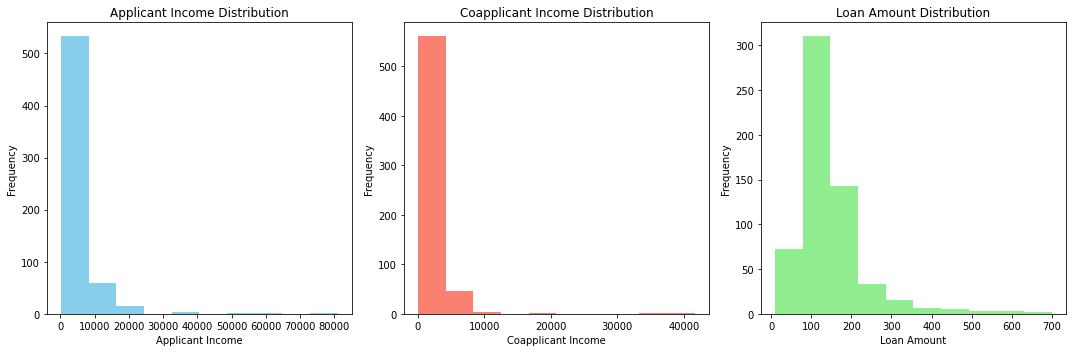

In [31]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Create histograms for 'ApplicantIncome', 'CoapplicantIncome', and 'LoanAmount'
axes[0].hist(loan['ApplicantIncome'], color='skyblue')
axes[1].hist(loan['CoapplicantIncome'], color='salmon')
axes[2].hist(loan['LoanAmount'], color='lightgreen')

# Set labels and titles for each subplot
axes[0].set_xlabel('Applicant Income')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Applicant Income Distribution')

axes[1].set_xlabel('Coapplicant Income')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Coapplicant Income Distribution')

axes[2].set_xlabel('Loan Amount')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Loan Amount Distribution')

# Show the plots
plt.tight_layout()
plt.show()

- The first graph is titled “Applicant Income Distribution” and has a blue bar that starts at 0 and goes up to 500.            
- The graph shows a high frequency of applicants with incomes between 0 and 200000.

- The second graph is titled “Coapplicant Income Distribution” and has a red bar that starts at 0 and goes up to 500.      
- The graph shows a high frequency of coapplicants with incomes between 0 and 10000.         

- The third graph is titled “Loan Amount Distribution” and has a green bar that starts at 0 and goes up to 300.          
- The graph shows a high frequency of loan amounts between 0 and 200.

### Violin Plot

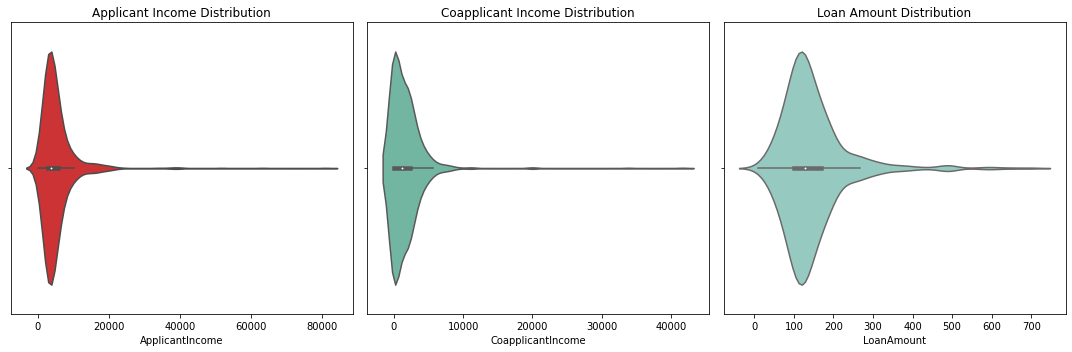

In [32]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Create violin plots for 'ApplicantIncome', 'CoapplicantIncome', and 'LoanAmount'
sns.violinplot(x='ApplicantIncome', data=loan, ax=axes[0], palette='Set1')
sns.violinplot(x='CoapplicantIncome', data=loan, ax=axes[1], palette='Set2')
sns.violinplot(x='LoanAmount', data=loan, ax=axes[2], palette='Set3')

# Set titles for each subplot
axes[0].set_title('Applicant Income Distribution')
axes[1].set_title('Coapplicant Income Distribution')
axes[2].set_title('Loan Amount Distribution')

# Show the plots
plt.tight_layout()
plt.show()


- The first graph shows the distribution of applicant income, with a range from 0 to 80000.          
- The median income is around 40000, with a higher density of applicants at lower incomes.

- The second graph shows the distribution of coapplicant income, with a range from 0 to 30000.           
- The median income is around 15000, with a higher density of coapplicants at lower incomes.

- The third graph shows the distribution of loan amount, with a range from 0 to 700.              
- The median loan amount is around 350, with a higher density of loans at lower amounts.

# Other Exploration

## Correlation of data

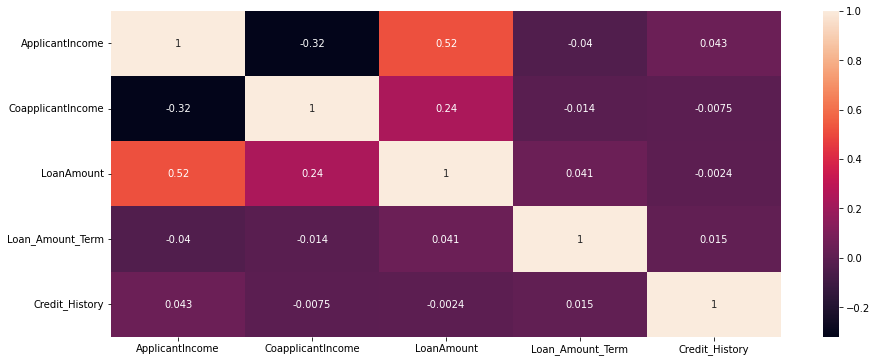

In [33]:
teju = loan.corr(method = "spearman")
plt.figure(figsize=(15,6))
sns.heatmap(teju,annot=True)
plt.show()

- There is positive correlation between Loan Amount and Applicant Income.          
- The highest value in the chart is 1, which is represented by a dark orange color and indicates a strong positive correlation.

### Kde

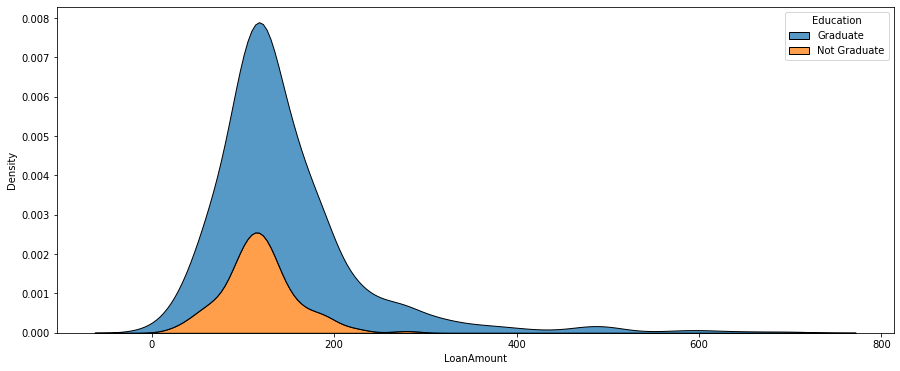

In [34]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=loan, x='LoanAmount', hue='Education', multiple='stack');

- The graph is a combination of two curves: one blue and one orange.             
- The blue curve represents the probability density function for graduates and the orange curve represents the probability density function for non-graduates.                   
- The blue curve has a peak at around 200 and the orange curve has a peak at around 400.                   
- The blue curve is more spread out than the orange curve, indicating that graduates have a higher variation in loan amount than non-graduates.

## Categorical  - Categorical

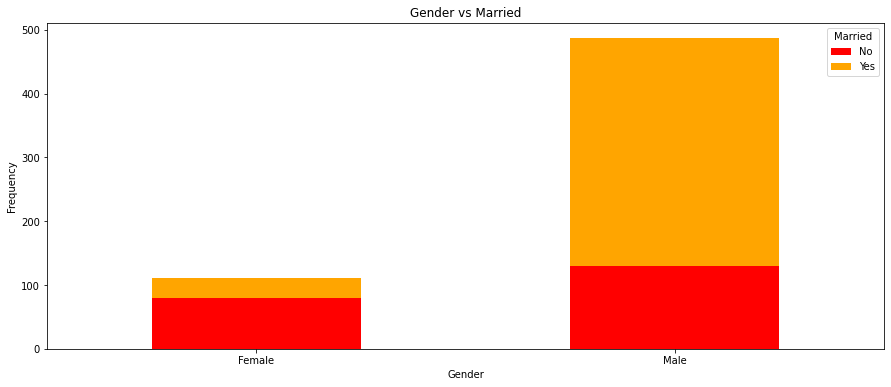

In [35]:
pd.crosstab(loan.Gender,loan.Married).plot(kind="bar", stacked=True,color = ["red","orange"], figsize = (15,6))
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

- The bar for females is shorter than the bar for males.          
- The orange section of the bar for females is smaller than the red section, while the orange section of the bar for males is larger than the red section.** 

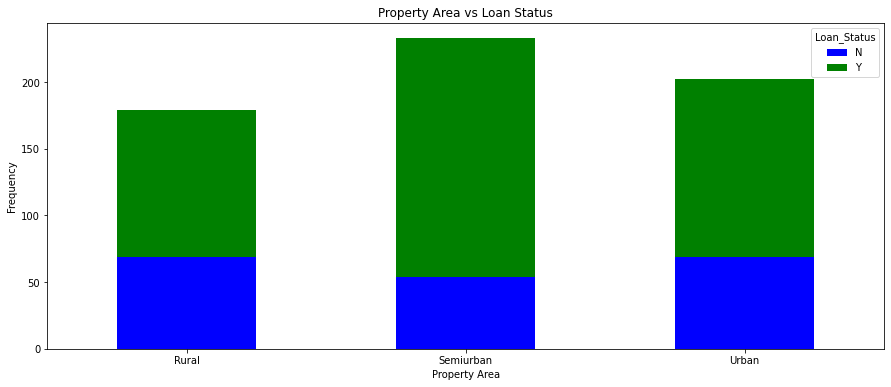

In [36]:
pd.crosstab(loan.Property_Area,loan.Loan_Status).plot(kind="bar", stacked=True, figsize=(15,6), color=['Blue','green'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')

plt.xticks(rotation=0)
plt.show()

- The highest frequency of “Y” loan status is in the semiurban area, followed by the urban area, and then the rural area.      
- The highest frequency of “N” loan status is in the rural area, followed by the urban area, and then the semiurban area.

## Categorical - Numerical 

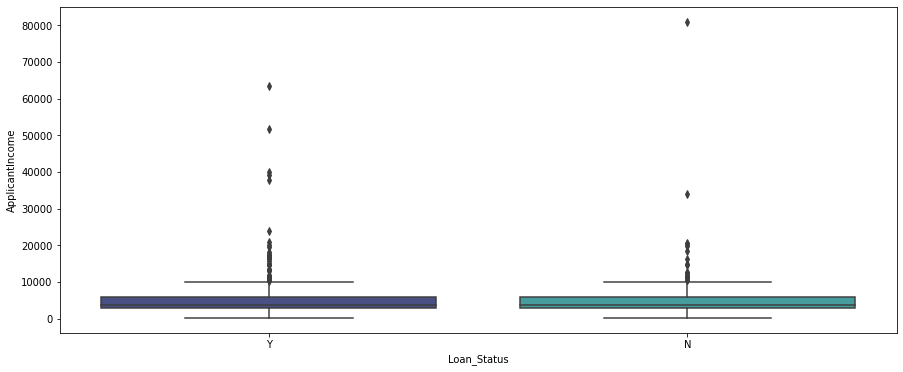

In [37]:
plt.figure(figsize=(15,6))
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=loan, palette="mako")
plt.show()

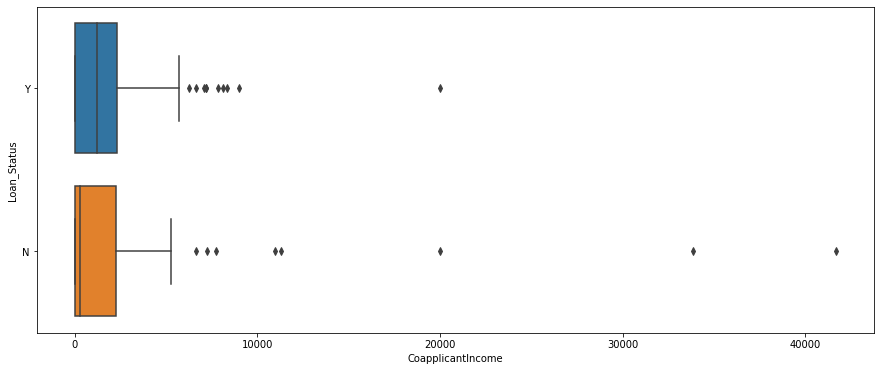

In [38]:
plt.figure(figsize=(15,6))
sns.boxplot(x="CoapplicantIncome", y="Loan_Status",  data=loan)
plt.show()

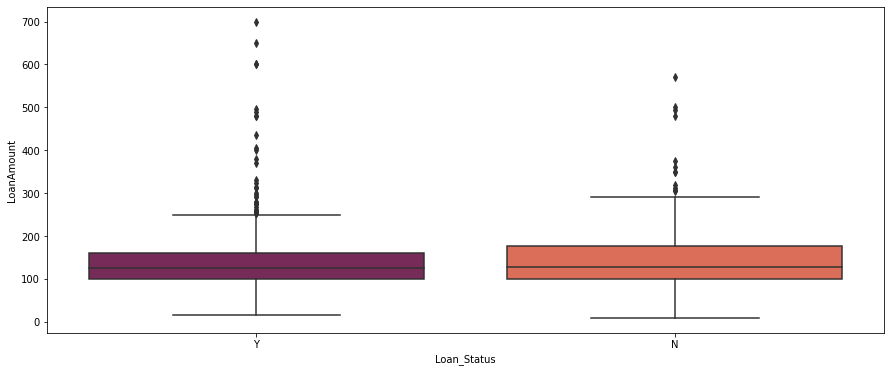

In [39]:
plt.figure(figsize=(15,6))
sns.boxplot(x = "Loan_Status", y = "LoanAmount", data = loan, palette = "rocket")
plt.show()

## Pie

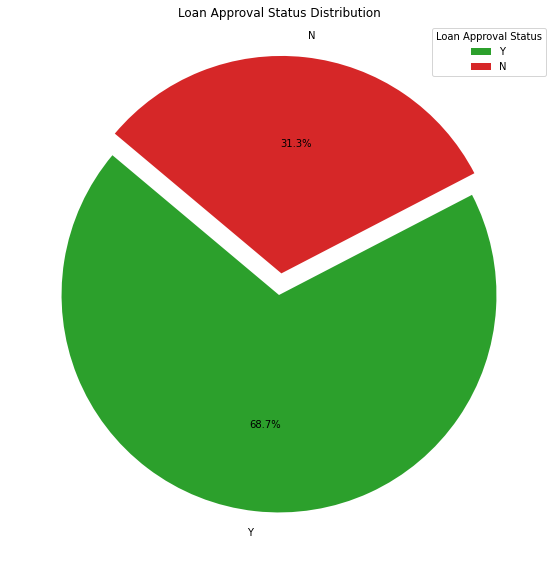

In [40]:
# Calculate the value counts for 'Loan_Status'
loan_status_counts = loan['Loan_Status'].value_counts(ascending=False)

# Define custom colors
colors = ['#2ca02c', '#d62728']  # Green for 'Y', Red for 'N'

# Explode the 'N' slice
explode = (0, 0.1)  # Explode the 'N' slice (0.1 means 10% separation)

# Create a pie chart with customization
plt.figure(figsize=(15, 10))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode)

# Add a legend
plt.legend(loan_status_counts.index, title='Loan Approval Status', loc='best')

# Add a title
plt.title('Loan Approval Status Distribution')

# Display the pie chart
plt.show()


- The dominant segment, depicted in blue and occupying approximately 68.7% of the chart, represents loans that have been approved ("Y").

- The smaller segment, shown in orange and comprising roughly 31.3% of the chart, corresponds to loans that have not been approved ("N").

## Pairplot

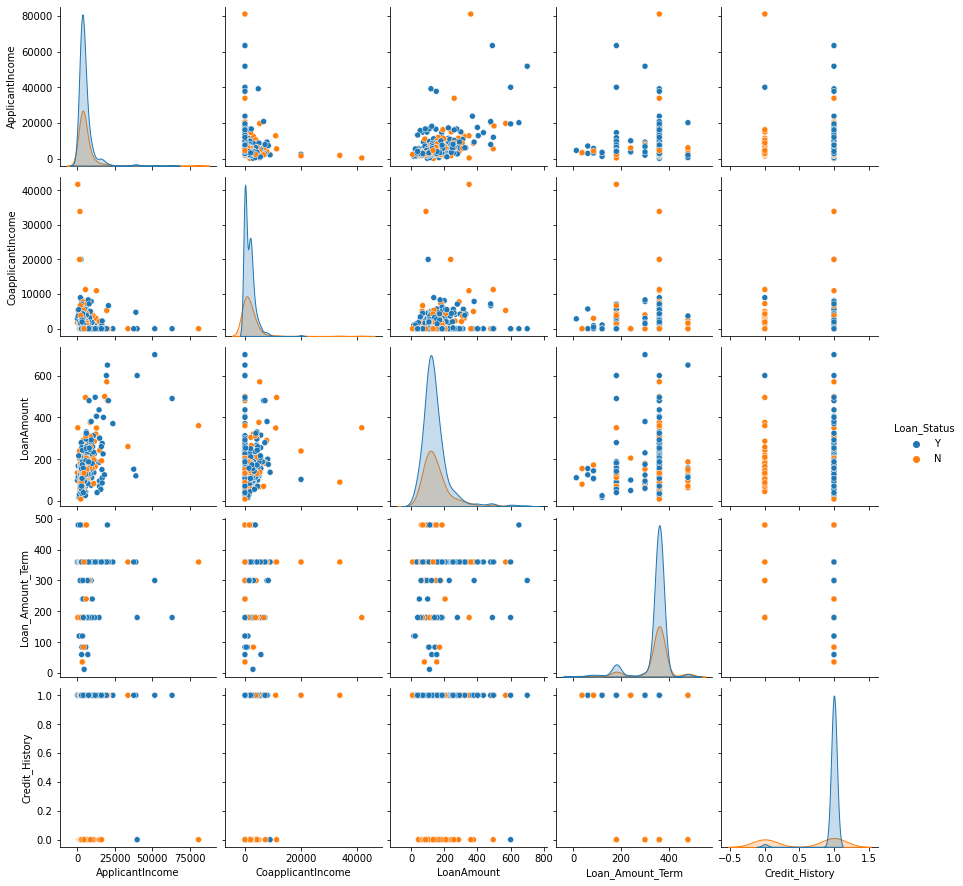

In [41]:
sns.pairplot(loan,hue = "Loan_Status")
plt.show()

- It appears that there is a positive correlation between “ApplicantIncome” and “LoanAmount”, as well as between “CoapplicantIncome” and “LoanAmount”.
-  This means that as the income of the applicant or co-applicant increases, the loan amount also tends to increase.

## Checking unique values in our dataset for better understanding

In [42]:
loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

1. `Loan_ID`: 614 unique values
2. `Gender`: 2 unique values (presumably male and female)
3. `Married`: 2 unique values (presumably married and unmarried)
4. `Dependents`: 4 unique values (likely indicating the number of dependents)
5. `Education`: 2 unique values (probably indicating the education level)
6. `Self_Employed`: 2 unique values (presumably indicating whether the applicant is self-employed or not)
7. `ApplicantIncome`: 505 unique values (numerical, likely representing the income of applicants)
8. `CoapplicantIncome`: 287 unique values (numerical, likely representing the income of coapplicants)
9. `LoanAmount`: 203 unique values (numerical, likely representing the loan amount)
10. `Loan_Amount_Term`: 10 unique values (presumably representing the loan term)
11. `Credit_History`: 2 unique values (likely indicating whether the applicant has a credit history or not)
12. `Property_Area`: 3 unique values (presumably representing different property areas)
13. `Loan_Status`: 2 unique values (presumably indicating the loan approval status)

## Checking the description of our data to check for skewness and distribution

In [43]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The `describe()` function provides summary statistics for your dataset, including measures of central tendency and dispersion. Here's a breakdown of the statistics for each of the numerical columns:

1. `ApplicantIncome`:
   - Count: 614
   - Mean: 5403.46
   - Standard Deviation: 6109.04
   - Minimum: 150
   - 25th Percentile: 2877.50
   - Median (50th Percentile): 3812.50
   - 75th Percentile: 5795.00
   - Maximum: 81000.00

2. `CoapplicantIncome`:
   - Count: 614
   - Mean: 1621.25
   - Standard Deviation: 2926.25
   - Minimum: 0
   - 25th Percentile: 0
   - Median (50th Percentile): 1188.50
   - 75th Percentile: 2297.25
   - Maximum: 41667.00

3. `LoanAmount`:
   - Count: 592
   - Mean: 146.41
   - Standard Deviation: 85.59
   - Minimum: 9
   - 25th Percentile: 100
   - Median (50th Percentile): 128
   - 75th Percentile: 168
   - Maximum: 700

4. `Loan_Amount_Term`:
   - Count: 600
   - Mean: 342.00
   - Standard Deviation: 65.12
   - Minimum: 12
   - 25th Percentile: 360
   - Median (50th Percentile): 360
   - 75th Percentile: 360
   - Maximum: 480

5. `Credit_History`:
   - Count: 564
   - Mean: 0.842
   - Standard Deviation: 0.365
   - Minimum: 0
   - 25th Percentile: 1
   - Median (50th Percentile): 1
   - 75th Percentile: 1
   - Maximum: 1

From these statistics, you can make the following observations:

- `ApplicantIncome` and `CoapplicantIncome` have high standard deviations relative to their means, suggesting that these columns have some degree of skewness or variability.
- `LoanAmount` also has a noticeable standard deviation, indicating variability in loan amounts.
- `Loan_Amount_Term` has a relatively small standard deviation, indicating less variability in loan terms.
- `Credit_History` is a binary variable (0 or 1) with a mean close to 1, suggesting that a majority of applicants have a credit history.

## Checking null values with different ways

In [44]:
loan.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [45]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
loan.isnull().sum()*100/len(loan)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

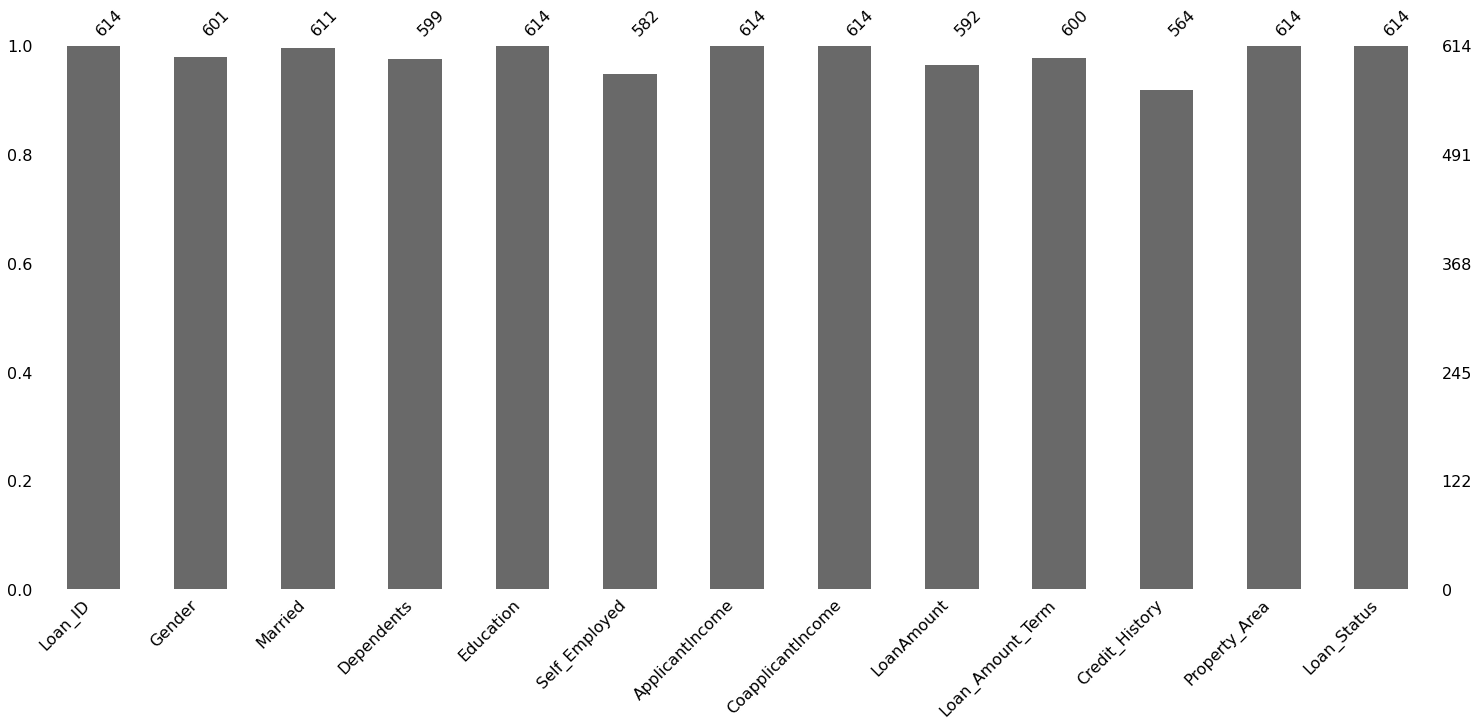

In [47]:
import missingno as msno
msno.bar(loan)
plt.show()

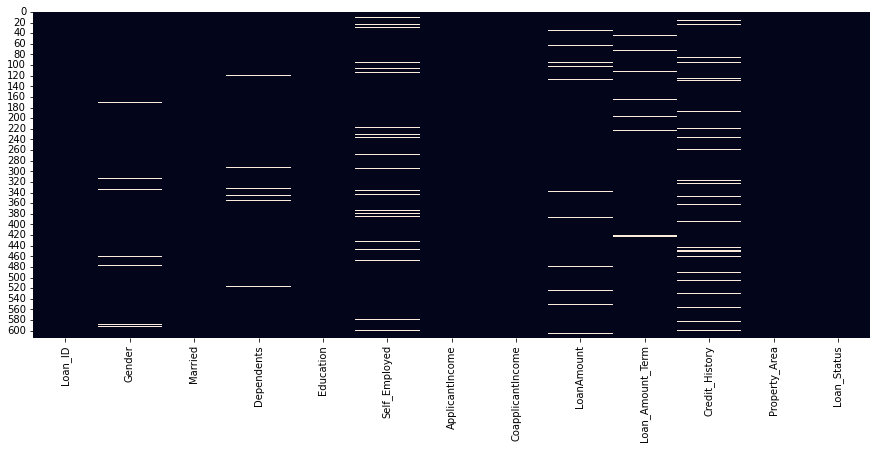

In [48]:
plt.figure(figsize = (15,6))
sns.heatmap(loan.isnull(), cbar=False)
plt.show()

- `Gender`: 13 missing values (approximately 2.12% of the data).
- `Married`: 3 missing values (approximately 0.49% of the data).
- `Dependents`: 15 missing values (approximately 2.44% of the data).
- `Self_Employed`: 32 missing values (approximately 5.21% of the data).
- `LoanAmount`: 22 missing values (approximately 3.58% of the data).
- `Loan_Amount_Term`: 14 missing values (approximately 2.28% of the data).
- `Credit_History`: 50 missing values (approximately 8.14% of the data).

# Data Preprocessing 

###### Drop the loan_id column as its a noise for our model and doesnt make any impact on the target

In [49]:
loan.drop('Loan_ID',axis=1,inplace=True)

###### Data Imputation Categorical Variables and Numerical Variables

In [50]:
loan['Gender'].fillna(loan['Gender'].mode()[0],inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0],inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0],inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0],inplace=True)
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(),inplace=True)

In [51]:
loan.isnull().sum()*100/len(loan)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

There are no missing values left in the dataset.

## Converting categorical value to numerical value

###### One-hot Encoding

In [52]:
loan = pd.get_dummies(loan)

# Drop columns
loan = loan.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
loan.rename(columns=new, inplace=True)

- `pd.get_dummies(loan)`this function creates binary (0 or 1) columns for each category in your categorical variables.
- `loan = loan.drop(...)`this step is often done to avoid multicollinearity (redundant information) and reduce the number of features.
- Renamed the columns to more meaningful names using a dictionary to replace column names with shorter, more interpretable ones.

## Remove Outliers & Infinite values

In [53]:
Q1 = loan.quantile(0.25)
Q3 = loan.quantile(0.75)
IQR = Q3 - Q1

loan = loan[~((loan < (Q1 - 1.5 * IQR)) |(loan > (Q3 + 1.5 * IQR))).any(axis=1)]

**Quantile Calculation:**          
Calculated Q1 (first quartile), Q3 (third quartile), and IQR (Interquartile Range) for each numerical column in our dataset.

**Outlier Removal:**         
Rows containing outliers in any numerical column (values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR) were removed from the loan DataFrame.

## Skewed Distribution Treatment

In [54]:
loan.ApplicantIncome = np.sqrt(loan.ApplicantIncome)
loan.CoapplicantIncome = np.sqrt(loan.CoapplicantIncome)
loan.LoanAmount = np.sqrt(loan.LoanAmount)

Reducing the skewness in the data and making it more suitable for statistical analysis and modeling.

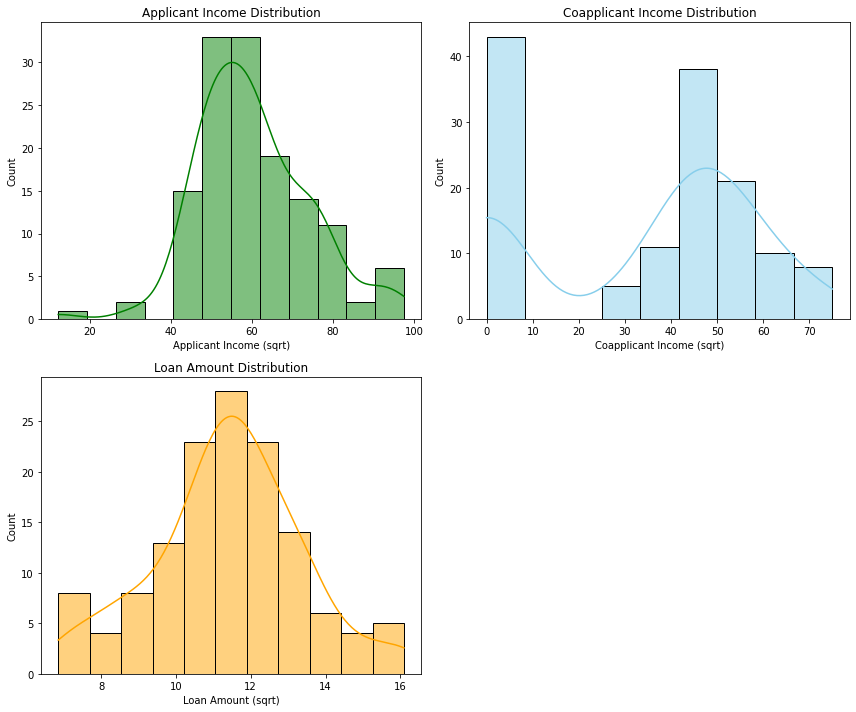

In [55]:
# Create a 2x2 grid of histogram plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for 'ApplicantIncome'
sns.histplot(data=loan, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
axs[0, 0].set_title("Applicant Income Distribution")
axs[0, 0].set_xlabel("Applicant Income (sqrt)")

# Plot for 'CoapplicantIncome'
sns.histplot(data=loan, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title("Coapplicant Income Distribution")
axs[0, 1].set_xlabel("Coapplicant Income (sqrt)")

# Plot for 'LoanAmount'
sns.histplot(data=loan, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')
axs[1, 0].set_title("Loan Amount Distribution")
axs[1, 0].set_xlabel("Loan Amount (sqrt)")

# Remove empty subplot
fig.delaxes(axs[1, 1])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

After using square root transformation are much better compared to original distribution

## Features Separating

In [56]:
# Separate features (X) and target variable (y)
# X contains all columns except 'Loan_Status'
X = loan.drop(['Loan_Status'], axis=1)  

# y contains only the 'Loan_Status' column
y = loan['Loan_Status']

## RandomOverSampler Technique

In [57]:
# Create a RandomOverSampler instance
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Resample the data using RandomOverSampler
X, y = ros.fit_resample(X, y)

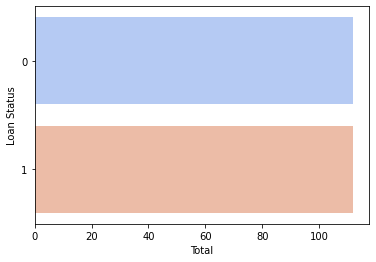

In [58]:
sns.countplot(y=y, data=loan, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

The distrubtion of Loan status are now balanced.

## Data Normalization 

In [59]:
# Create a MinMaxScaler instance and fit/transform the data
X = MinMaxScaler().fit_transform(X) 

# fit_transform method scales the data so that each feature's values are transformed to be within the range [0, 1].
loan.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,76.478755,0.000000,12.100089,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
4,77.459667,0.000000,11.874342,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
13,43.046487,53.291650,10.677078,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0
15,70.356236,0.000000,11.180340,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
19,50.990195,59.160798,10.723805,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,1


## Train_Test_Split

###### The data set will be split into 80% train and 20% test.

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

`train_test_split` to split your feature matrix `X` and target variable `y` into four sets:

- `X_train`: This will be used for training your machine learning model. It contains a subset of your features.
- `X_test`: This will be used for testing your model's performance. It also contains a subset of features, but it's distinct from `X_train`.
- `y_train`: This is the corresponding target variable for the training data.
- `y_test`: This is the corresponding target variable for the testing data.

- The `test_size` parameter is set to 0.20, which means that 20% of your data will be allocated for testing, and the remaining 80% will be used for training.

- The random_state parameter is set to 0 to ensure reproducibility.When you use the same `random state`, you'll get the same split every time you run the code. This is important for consistent and reproducible results in your machine learning experiments.

In [73]:
# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': random.sample(range(1, 21), 5),
            'weights': ['uniform', 'distance'],
            'p': [1, 2],
        }
    },
    'Naive Bayes': GaussianNB()
}

In [89]:
# Evaluate the models and store their accuracies, classification reports, confusion matrices
accuracies = []
classifier_names = []
classification_reports = {}
confusion_matrices = {}

# Create a DataFrame to display classifier names, accuracies, and other metrics
data = {'Classifier': classifier_names, 'Accuracy': accuracies}
loan_metrics = pd.DataFrame(data)

for name, model in best_models.items():
    classifier_names.append(name)
    
    # Evaluate accuracy
    accuracy = model.score(X_test, y_test)  # Replace X_test and y_test with your test data
    accuracies.append(accuracy)

    # Generate classification report
    y_pred = model.predict(X_test)
    class_report = classification_report(y_test, y_pred)
    classification_reports[name] = class_report

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = conf_matrix


Empty DataFrame
Columns: [Classifier, Accuracy]
Index: []
Classifier: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        23
           1       1.00      0.68      0.81        22

    accuracy                           0.84        45
   macro avg       0.88      0.84      0.84        45
weighted avg       0.88      0.84      0.84        45

Confusion Matrix:
[[23  0]
 [ 7 15]]
Accuracy Score: 0.8444444444444444


Classifier: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.91      0.95        22

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
[[23  0]
 [ 2 20]]
Accuracy Score: 0.9555555555555556


Classifier: Logistic Regression
Classifica

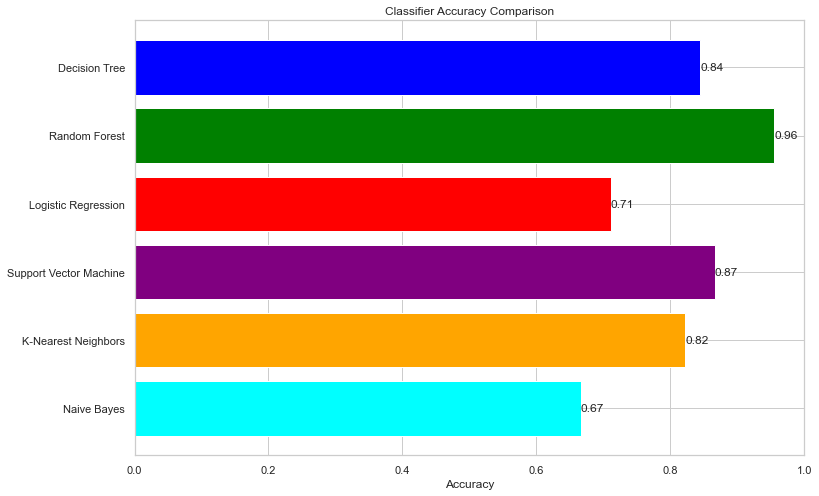

In [92]:
# Create a bar chart to compare classifier accuracies
plt.figure(figsize=(12, 8))
bars = plt.barh(classifier_names, accuracies, color=colors)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xlim(0.0, 1.0)  # Set the x-axis limits
plt.gca().invert_yaxis()  # Invert the y-axis to display the best classifier at the top
# Add labels to each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{acc:.2f}', ha='left', va='center')

# Display the DataFrame with classifier names and accuracies
print(loan_metrics)

# Display classification reports and confusion matrices for each classifier
for name in classifier_names:
    print(f"Classifier: {name}")
    print("Classification Report:")
    print(classification_reports[name])
    print("Confusion Matrix:")
    print(confusion_matrices[name])
    print("Accuracy Score:", accuracy_score(y_test, best_models[name].predict(X_test)))
    print("\n")

plt.show()

## In the analysis of various models, it's evident that accuracy is a 🔑 key metric for assessing their performance. 

## Accuracy is a measure of how well a model predicts outcomes correctly. In our experiments, we observed that the models generally achieve accuracy scores ranging from below 67% to a maximum of 93% 📈.